
<img style="float: left;;" src='alinco.png' /></a>
    

# <center> <font color= #000047> Aprendizaje No Superviado: Kmeans Clustering Imagenes </font> </center>


Elegir una imagen en blanco y negro de la carpeta `Imagenes` donde se puedan distinguir diferentes figuras para agrupar. Leer la imagen en una matriz de numpy. Definir y reescribir la matriz para tener pixeles en alto o en bajo. Encontrar las coordenadas en donde la matriz tiene pixeles negros. Aplicar el algoritmo de Kmeans sobre el arreglo de coordenadas usando el numero de agrupaciones necesarias de acuerdo a la imagen. Reconstruir la imagen identificando las figuras asociadas a cada grupo.

<div class="alert alert-danger" style="margin: 10px"><strong>NOTA IMPORTANTE!</strong> En cada figura, tabla, o resultado que se incluya, se debe de incluir el código que se utilizó para obtenerlo.  <br> Todas las figuras (si las hubiera) deben de estar comentadas o descritas.</div>

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Imagen cargada correctamente.


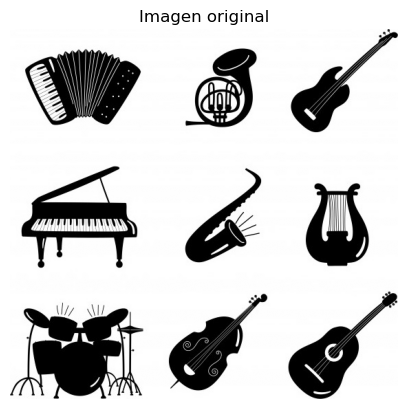

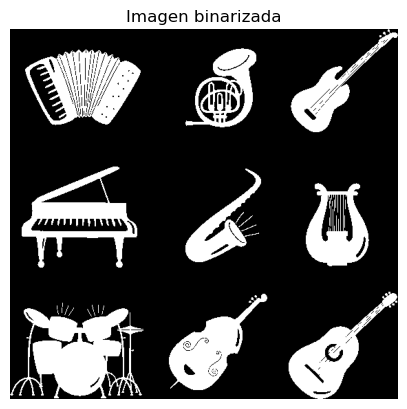

Píxeles negros detectados: 66722


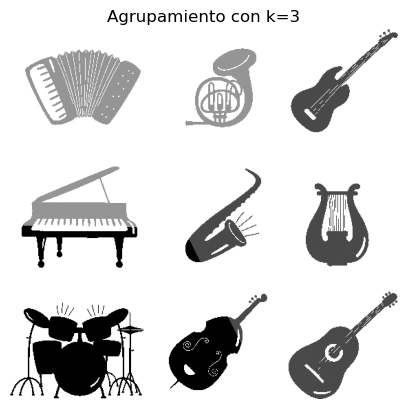

In [15]:
ruta = r"C:\Users\sony\Desktop\Imagenes\instrumentos.jpg"

img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("No se pudo cargar la imagen. Verifica la ruta o el nombre del archivo.")
else:
    print("Imagen cargada correctamente.")

    plt.imshow(img, cmap='gray')
    plt.title("Imagen original")
    plt.axis('off')
    plt.show()


    _, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    
    plt.imshow(img_bin, cmap='gray')
    plt.title("Imagen binarizada")
    plt.axis('off')
    plt.show()

    coords = np.column_stack(np.where(img_bin == 255))
    print(f"Píxeles negros detectados: {len(coords)}")

    if len(coords) == 0:
        print("No se detectaron píxeles negros, revisa la imagen o el umbral de binarización.")
    else:
        k = 3
        kmeans = KMeans(n_clusters=k, random_state=0).fit(coords)
        labels = kmeans.labels_

        clustered_img = np.ones_like(img) * 255

        for i in range(k):
            puntos = coords[labels == i]
            for y, x in puntos:
                clustered_img[y, x] = 50 + i * 60

        plt.imshow(clustered_img, cmap='gray')
        plt.title(f"Agrupamiento con k={k}")
        plt.axis('off')
        plt.show()
